# **Week - 2: Regression**

## **Import Dependencies**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import kaggle
import requests

import warnings
warnings.filterwarnings('ignore')

### ****Download the dataset****

In [ ]:
# kaggle.api.authenticate()

# kaggle.api.dataset_download_files('CooperUnion/cardataset', unzip=True)

# kaggle.api.dataset_metadata('CooperUnion/cardataset', path='metadata')

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## ****Exploratory Data Analysis****

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [5]:
for col in df.columns:
    print(f"For column {col}: {df[col].unique()[:5]} \n")

For column make: ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler'] 

For column model: ['1 Series M' '1 Series' '100' '124 Spider' '190-Class'] 

For column year: [2011 2012 2013 1992 1993] 

For column engine_fuel_type: ['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'] 

For column engine_hp: [335. 300. 230. 320. 172.] 

For column engine_cylinders: [ 6.  4.  5.  8. 12.] 

For column transmission_type: ['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN'] 

For column driven_wheels: ['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive'] 

For column number_of_doors: [ 2.  4.  3. nan] 

For column market_category: ['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance'] 

For column vehicle_size: ['Compact' 'Midsize' 'Large'] 

For column vehicle_style: ['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback'] 

For column high

### Distribution of Price

<Figure size 1500x800 with 0 Axes>

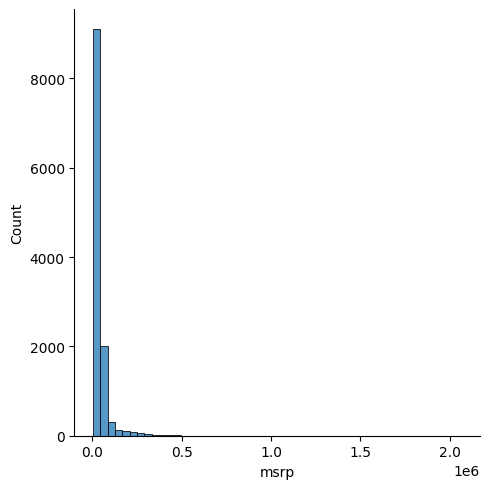

In [6]:
plt.figure(figsize=(15, 8))
sns.displot(df.msrp, bins=50)

<Figure size 1500x800 with 0 Axes>

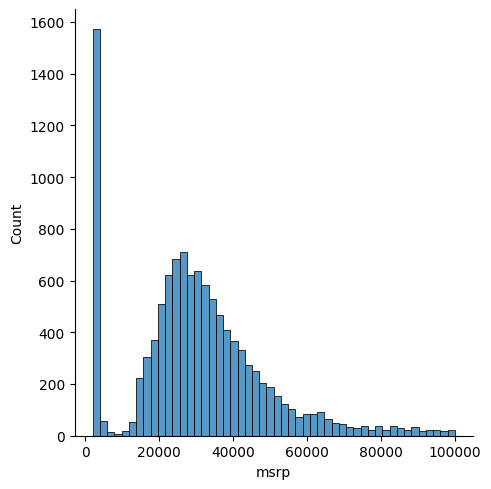

In [7]:
plt.figure(figsize=(15, 8))
sns.displot(df.msrp[df.msrp < 100000], bins=50)

### Missing Values

In [8]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## **Setting up the validation framework**

In [9]:
len(df)

11914

In [10]:
def trainValidateTest_Shuffle(df: pd.DataFrame, partitions: float, seed: np.integer):
    """
        This is a function use for splitting dataset into train, validation, and test.
        Train: 
        Validation: 
        Test: 
    """
    
    n = len(df)
    n_val = int(n * partitions)
    n_test = int(n * partitions)
    n_train = n - n_val - n_test
    
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train: n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    
    return df_train, df_val, df_test

In [11]:
help(np.random.shuffle)

Help on method shuffle in module numpy.random:

shuffle(x) method of numpy.random.mtrand.RandomState instance
    shuffle(x)

    Modify a sequence in-place by shuffling its contents.

    This function only shuffles the array along the first axis of a
    multi-dimensional array. The order of sub-arrays is changed but
    their contents remains the same.

    .. note::
        New code should use the `~numpy.random.Generator.shuffle`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.

    Parameters
    ----------
    x : ndarray or MutableSequence
        The array, list or mutable sequence to be shuffled.

    Returns
    -------
    None

    See Also
    --------
    random.Generator.shuffle: which should be used for new code.

    Examples
    --------
    >>> arr = np.arange(10)
    >>> np.random.shuffle(arr)
    >>> arr
    [1 7 5 2 9 4 3 6 0 8] # random

    Multi-dimensional arrays are only shuffled along the firs

In [12]:
df_train, df_val, df_test = trainValidateTest_Shuffle(df=df, partitions=0.2, seed=2)
len(df_train), len(df_val), len(df_test)


(7150, 2382, 2382)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [14]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [15]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [16]:
len(y_train)

7150

## **Linear Regression**

In [17]:
df_train.iloc[10]

make                                 Rolls-Royce
model                     Phantom Drophead Coupe
year                                        2015
engine_fuel_type     premium unleaded (required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      AUTOMATIC
driven_wheels                   rear wheel drive
number_of_doors                              2.0
market_category        Exotic,Luxury,Performance
vehicle_size                               Large
vehicle_style                        Convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [24]:
xi = np.array([453.0, 11, 86])

w0 = 7.17
w = np.array([0.01, 0.04, 0.002])

In [25]:
def linear_regression(x_i: np.array):
    n = len(x_i)

    pred = w0
    
    for j in range(n):
        pred = pred + (w[j] * x_i[j])
        
    return pred

In [26]:
linear_regression(xi)

np.float64(12.312)

In [ ]:
np.expm1(12.312) # Do the exponent to reverse the logarithmic value

np.float64(222347.2221101062)

In [28]:
np.log1p(222347.2221101062)

np.float64(12.312)

## **Linear Regression Vector Form**

## **Training a Linear Regression Model**